# WITHOUT OUTLIERS, WITHOUT DUPLICATES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('MPGPrediction.csv')

In [3]:
df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


**Horsepower** feature seems **numerical** but it is of object datatype. This means that there are some abnormal entries(NaN, spl char) in the feature. And it needs to be converted to a numeric data type

In [5]:
df.shape

(398, 9)

## Number of unique entries in each feature

In [6]:
for col in df.columns:
    num_unique = len(df[col].unique())
    print(f"{col} : {num_unique} ")

mpg : 129 
cylinders : 5 
displacement : 82 
horsepower : 94 
weight : 351 
acceleration : 95 
model year : 13 
origin : 3 
car name : 305 


## Checking for missing values

In [7]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

**No column contains a NaN value. But they might contain special characters in
place of int or float**

In [8]:
df_cols = df.columns
df_cols

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [9]:
spl_char = r'[@#&$%+-/_?*]'
for col_name in df_cols:
  spl_col = df[col_name].astype(str).str.contains(spl_char)
  spl_char_rows = df.loc[spl_col]
  print(spl_char_rows)

      mpg  cylinders  displacement horsepower  weight  acceleration  \
0    18.0          8         307.0        130    3504          12.0   
1    15.0          8         350.0        165    3693          11.5   
2    18.0          8         318.0        150    3436          11.0   
3    16.0          8         304.0        150    3433          12.0   
4    17.0          8         302.0        140    3449          10.5   
..    ...        ...           ...        ...     ...           ...   
393  27.0          4         140.0         86    2790          15.6   
394  44.0          4          97.0         52    2130          24.6   
395  32.0          4         135.0         84    2295          11.6   
396  28.0          4         120.0         79    2625          18.6   
397  31.0          4         119.0         82    2720          19.4   

     model year  origin                   car name  
0            70       1  chevrolet chevelle malibu  
1            70       1          buick sk

Horsepower column contains 6 rows with '?'

**Checking if ''car' contains '?' before replacing '?' in 'horsepower'**

In [10]:
rows_with_qm = df.loc[df['car name'] == '?']
rows_with_qm

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name


In [11]:
df['horsepower'].replace('?', np.nan, inplace=True)

In [12]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

<Axes: >

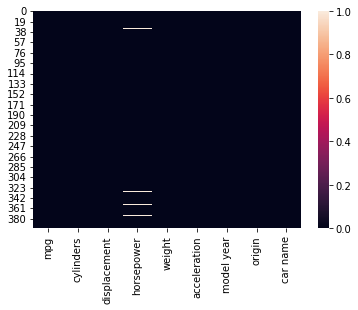

In [13]:
sns.heatmap(df.isnull())

Checking the **data distribution** in horsepower

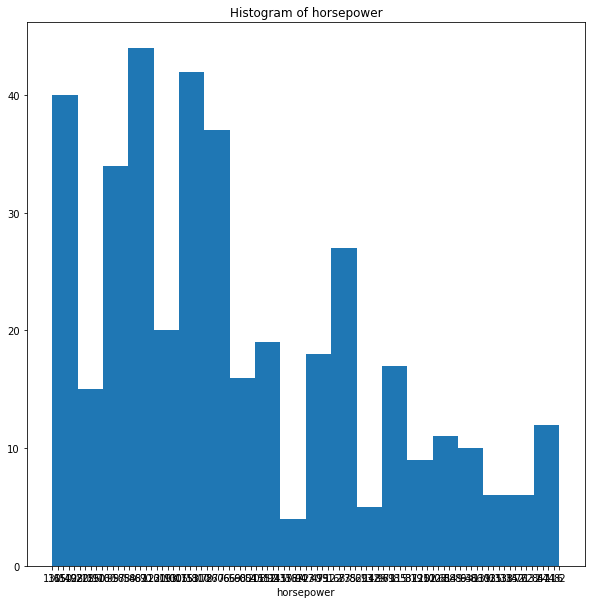

In [14]:
plt.figure(figsize=(10, 10))
plt.hist(df['horsepower'].dropna(), bins=20)
plt.xlabel('horsepower')
plt.title('Histogram of horsepower')
plt.show()

**The distribution is skewed. Hence, the '?' values need to be replaced by the median**

In [15]:
median = df['horsepower'].median()
median

93.5

In [16]:
df['horsepower'] = df['horsepower'].fillna(median)

<Axes: >

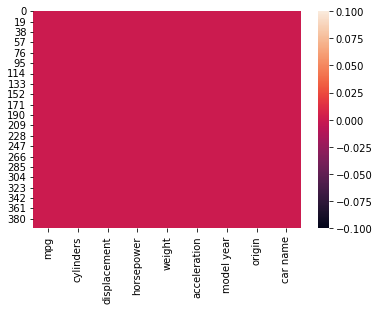

In [17]:
sns.heatmap(df.isnull())

In [18]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

Converting datatype of 'horsepower' from **object to float**

In [19]:
df[['horsepower']] = df[['horsepower']].astype(float)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


## Checking for outliers

In [21]:
df_with_outliers = df[['mpg', 'cylinders', 'displacement','horsepower', 'weight', 'acceleration', 'model year', 'origin']]

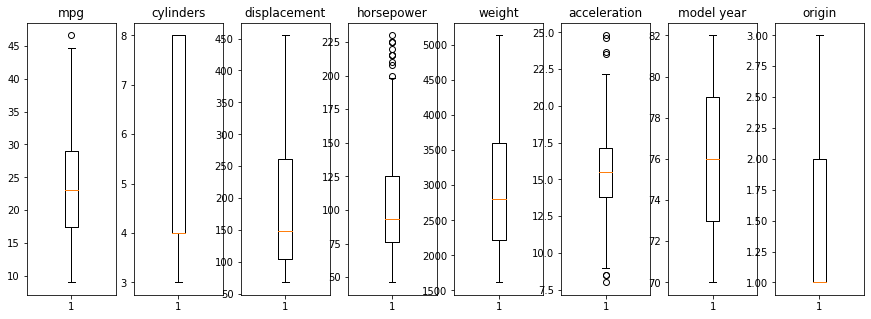

In [22]:
fig, axs = plt.subplots(ncols=len(df_with_outliers.columns), figsize=(15, 5))
for i, col in enumerate(df_with_outliers.columns):
    axs[i].boxplot(df_with_outliers[col])
    axs[i].set_title(col)

plt.show()

**horsepower, acceleration** have outliers

### Calculate number of outliers and print their rows for each feature

In [23]:
def print_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    print(f"{len(outliers)} outliers in {column.name}:")
    print(df.loc[outliers.index])


for col in df_with_outliers.columns:
    print_outliers(df_with_outliers[col])

1 outliers in mpg:
      mpg  cylinders  displacement  horsepower  weight  acceleration  \
322  46.6          4          86.0        65.0    2110          17.9   

     model year  origin   car name  
322          80       3  mazda glc  
0 outliers in cylinders:
Empty DataFrame
Columns: [mpg, cylinders, displacement, horsepower, weight, acceleration, model year, origin, car name]
Index: []
0 outliers in displacement:
Empty DataFrame
Columns: [mpg, cylinders, displacement, horsepower, weight, acceleration, model year, origin, car name]
Index: []
11 outliers in horsepower:
      mpg  cylinders  displacement  horsepower  weight  acceleration  \
6    14.0          8         454.0       220.0    4354           9.0   
7    14.0          8         440.0       215.0    4312           8.5   
8    14.0          8         455.0       225.0    4425          10.0   
13   14.0          8         455.0       225.0    3086          10.0   
25   10.0          8         360.0       215.0    4615        

11 outliers in horsepower, 7 outliers in acceleration

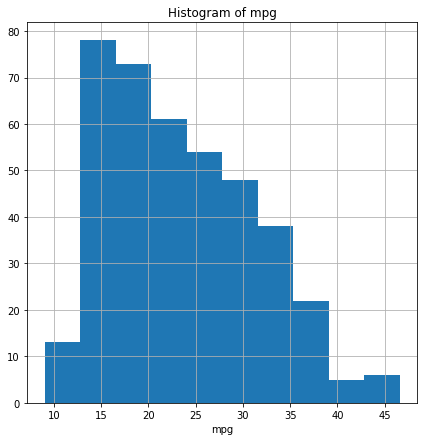

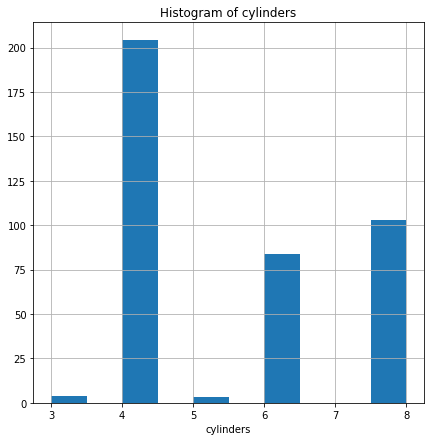

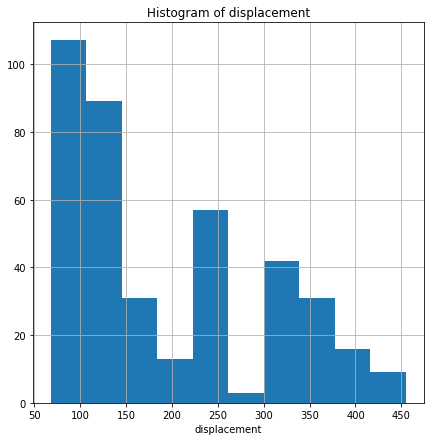

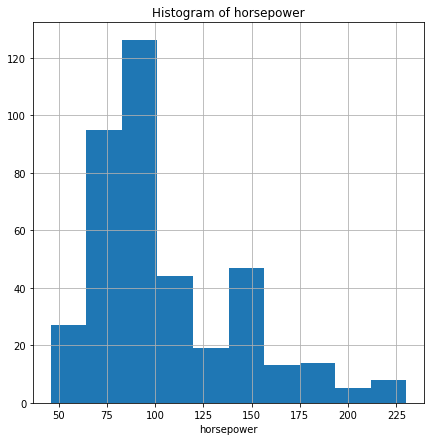

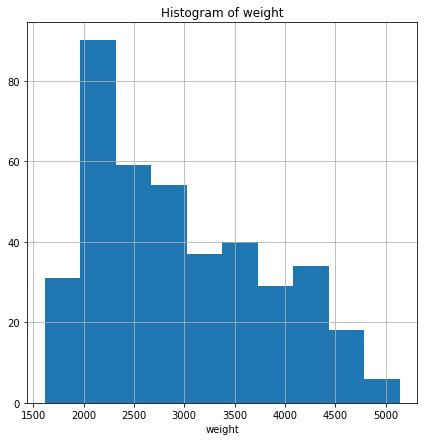

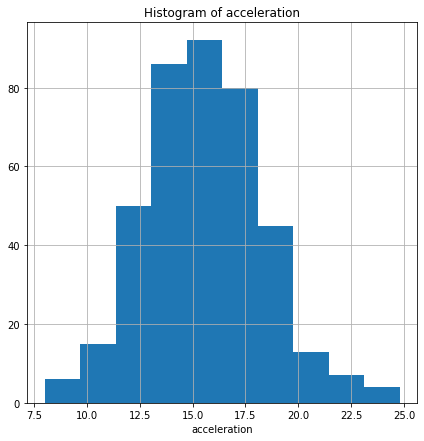

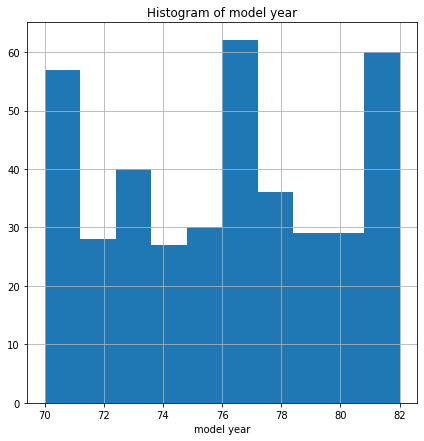

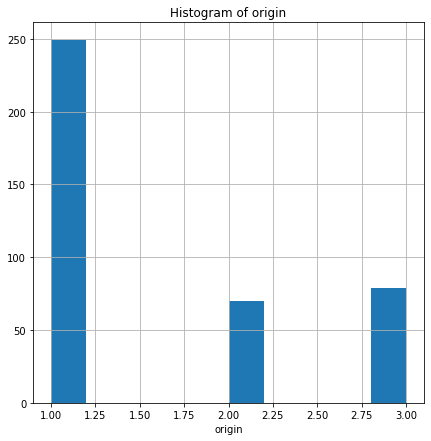

In [24]:
for col in df_with_outliers.columns:
  plt.figure(figsize=(7, 7))
  df_with_outliers[col].hist()
  plt.xlabel(col)
  plt.title('Histogram of {}'.format(col))
  plt.show()

In [25]:
percent_outliers_horsepower = (11/398) * 100
percent_outliers_acceleration = (7/398) * 100

In [26]:
percent_outliers_horsepower

2.763819095477387

In [27]:
percent_outliers_acceleration

1.7587939698492463

### Horsepower

In [28]:
df['horsepower'].quantile(0.97)

198.0

In [29]:
hp_outliers_indices = [6,7,8,13,25,26,27,67,94,95,116]

In [30]:
for index in hp_outliers_indices:
  df.loc[index, 'horsepower'] = median

In [31]:
df.loc[116]

mpg                           16.0
cylinders                        8
displacement                 400.0
horsepower                    93.5
weight                        4278
acceleration                   9.5
model year                      73
origin                           1
car name        pontiac grand prix
Name: 116, dtype: object

### Acceleration

In [32]:
df['acceleration'].quantile(0.98)

21.806

In [33]:
acc_outliers_indices = [7,9,11,59,299,326,394]

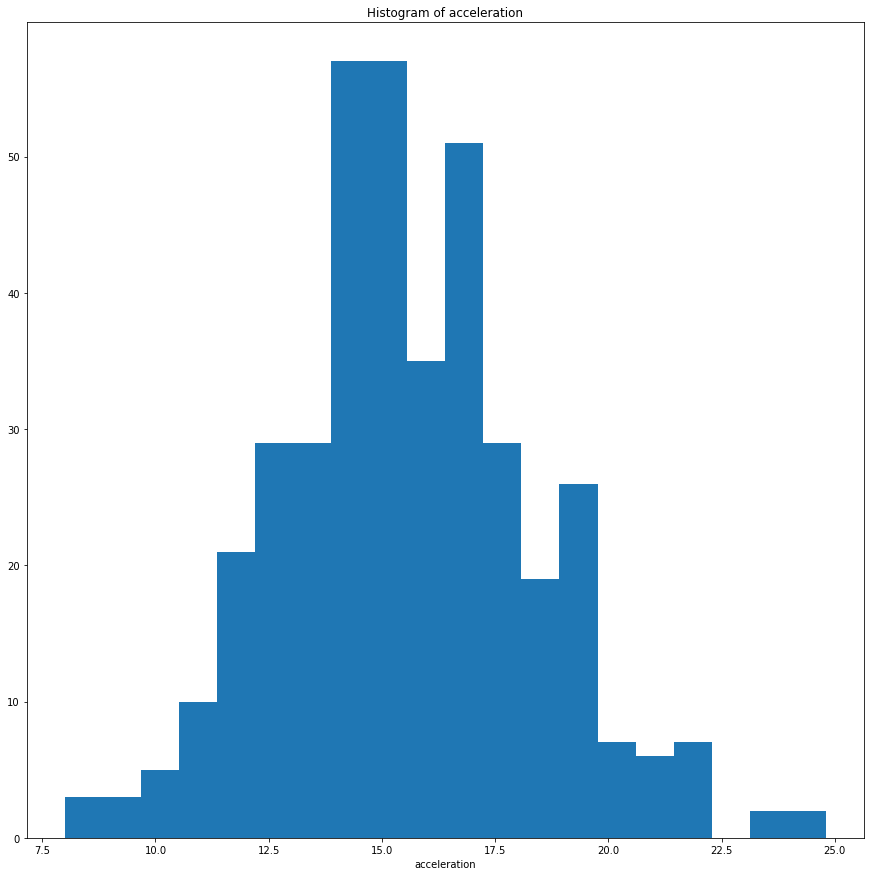

In [34]:
plt.figure(figsize=(15, 15))
plt.hist(df['acceleration'], bins=20)
plt.xlabel('acceleration')
plt.title('Histogram of acceleration')
plt.show()

In [35]:
acc_mean = df['acceleration'].mean()
acc_mean

15.568090452261307

In [36]:
for index in acc_outliers_indices:
  df.loc[index, 'acceleration'] = acc_mean

In [37]:
df.loc[11]

mpg                           14.0
cylinders                        8
displacement                 340.0
horsepower                   160.0
weight                        3609
acceleration              15.56809
model year                      70
origin                           1
car name        plymouth 'cuda 340
Name: 11, dtype: object

### Checking if outliers are still there

In [38]:
selected_features = ['mpg', 'cylinders', 'displacement','horsepower', 'weight', 'acceleration', 'model year', 'origin']
df_wout_outliers = df[selected_features].copy()

In [39]:
def print_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    print(f"{len(outliers)} outliers in {column.name}:")
    print(df_wout_outliers.loc[outliers.index])


for col in df_wout_outliers.columns:
    print_outliers(df_wout_outliers[col])

1 outliers in mpg:
      mpg  cylinders  displacement  horsepower  weight  acceleration  \
322  46.6          4          86.0        65.0    2110          17.9   

     model year  origin  
322          80       3  
0 outliers in cylinders:
Empty DataFrame
Columns: [mpg, cylinders, displacement, horsepower, weight, acceleration, model year, origin]
Index: []
0 outliers in displacement:
Empty DataFrame
Columns: [mpg, cylinders, displacement, horsepower, weight, acceleration, model year, origin]
Index: []
16 outliers in horsepower:
      mpg  cylinders  displacement  horsepower  weight  acceleration  \
5    15.0          8         429.0       198.0    4341      10.00000   
9    15.0          8         390.0       190.0    3850      15.56809   
28    9.0          8         304.0       193.0    4732      18.50000   
39   14.0          8         400.0       175.0    4464      11.50000   
42   12.0          8         383.0       180.0    4955      11.50000   
44   13.0          8         400

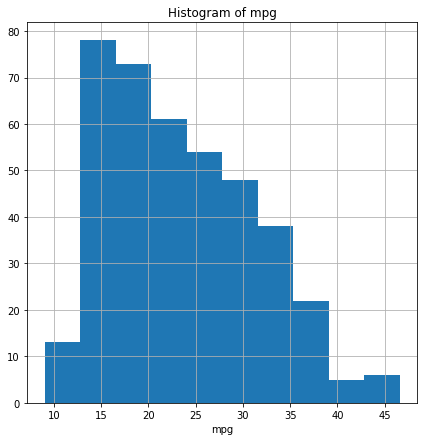

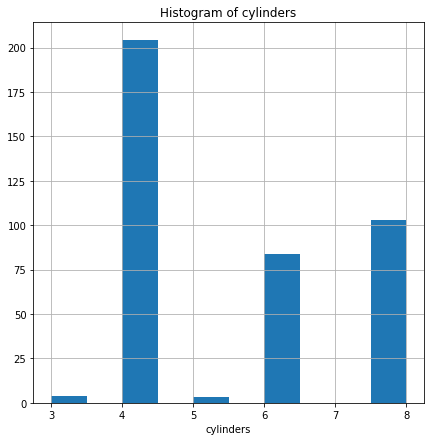

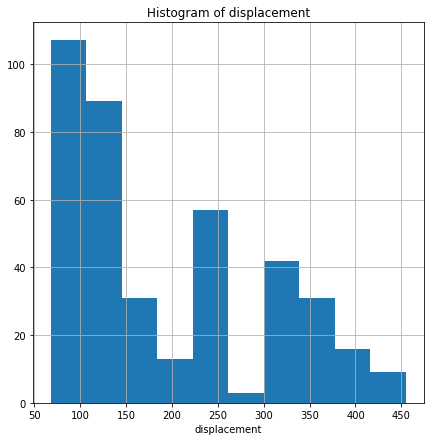

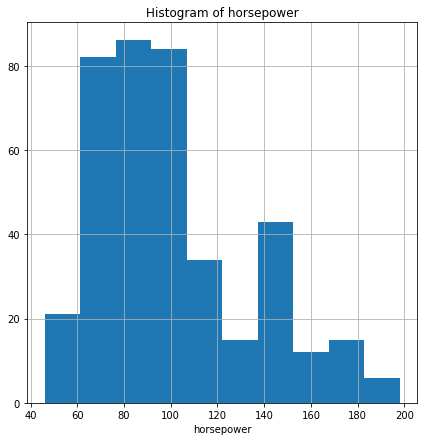

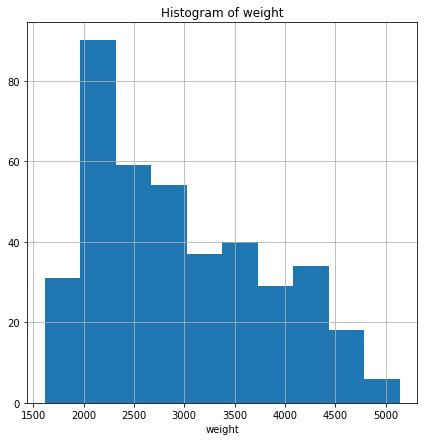

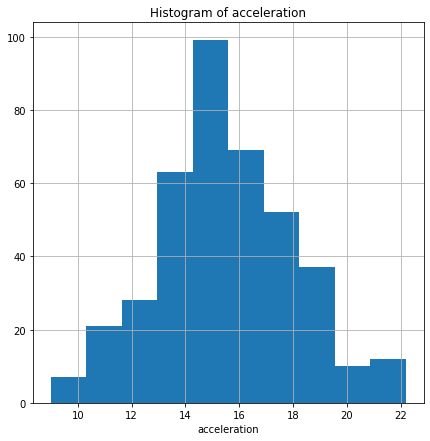

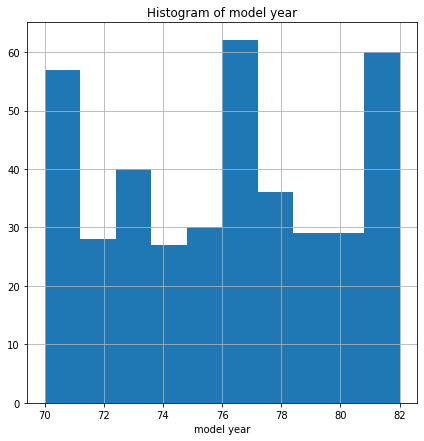

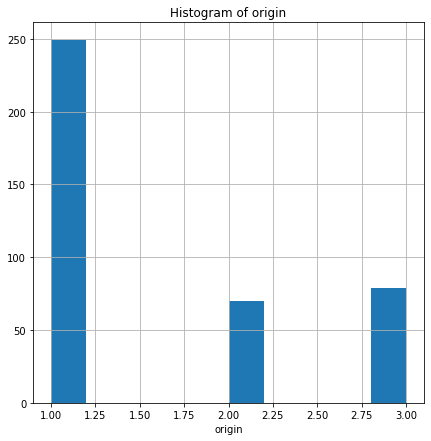

In [40]:
for col in df_wout_outliers.columns:
  plt.figure(figsize=(7, 7))
  df_wout_outliers[col].hist()
  plt.xlabel(col)
  plt.title('Histogram of {}'.format(col))
  plt.show()

Even after replacing initially found outliers with median/mean, other values are being considered as outliers. This means that the intial set of outliers are **NOT outliers**

## Checking for duplicate data

In [41]:
duplicates = df.duplicated(subset=df.columns, keep=False)
df[duplicates]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name


We saw that

> cylinders - 5 unique values

> model year - 13 unique values

> origin - 3 unique values

A car model with the same model year, origin and no. of cylinders can't have varying horsepower, displacement, weight, mpg.

Let us check if there are any rows which have **same car name, model year, origin** and **different horsepower, mpg, etc.**

In [42]:
col_duplicates = ['cylinders', 'model year', 'origin','car name']
duplicates = df.duplicated(subset=col_duplicates, keep=False)

# print rows with duplicates
print(df[duplicates])

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
338  27.2          4         135.0        84.0    2490          15.7   
342  30.0          4         135.0        84.0    2385          12.9   

     model year  origin          car name  
338          81       1  plymouth reliant  
342          81       1  plymouth reliant  


In [43]:
col_duplicates = ['model year', 'origin','car name']
duplicates = df.duplicated(subset=col_duplicates, keep=False)

# print rows with duplicates
print(df[duplicates])

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
168  23.0          4         140.0        83.0    2639          17.0   
174  18.0          6         171.0        97.0    2984          14.5   
338  27.2          4         135.0        84.0    2490          15.7   
342  30.0          4         135.0        84.0    2385          12.9   

     model year  origin          car name  
168          75       1        ford pinto  
174          75       1        ford pinto  
338          81       1  plymouth reliant  
342          81       1  plymouth reliant  


In [44]:
col_duplicates = ['cylinders', 'origin','car name']
duplicates = df.duplicated(subset=col_duplicates, keep=False)

# print rows with duplicates
print(df[duplicates])

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
5    15.0          8         429.0       198.0    4341      10.00000   
6    14.0          8         454.0        93.5    4354       9.00000   
7    14.0          8         440.0        93.5    4312      15.56809   
8    14.0          8         455.0        93.5    4425      10.00000   
13   14.0          8         455.0        93.5    3086      10.00000   
..    ...        ...           ...         ...     ...           ...   
363  22.4          6         231.0       110.0    3415      15.80000   
372  27.0          4         151.0        90.0    2735      18.00000   
381  36.0          4         107.0        75.0    2205      14.50000   
382  34.0          4         108.0        70.0    2245      16.90000   
383  38.0          4          91.0        67.0    1965      15.00000   

     model year  origin                 car name  
5            70       1         ford galaxie 500  
6            70       1         c

Although these 137 rows have duplicates, deleting 137 would result in a loss of information.

### Deleting duplicate rows

In [45]:
df.drop_duplicates(subset = ["car name", "origin", "model year"], inplace = True)

In [46]:
col_duplicates = ['model year', 'origin','car name']
duplicates = df.duplicated(subset=col_duplicates, keep=False)

if duplicates.any():
    print("Duplicates found")
    print(df[duplicates])
else:
    print("No duplicates found")

No duplicates found


## EDA

### Lineplot

In [47]:
cols_for_graph = ['cylinders', 'displacement', 'weight', 'horsepower',
       'acceleration', 'model year', 'origin']

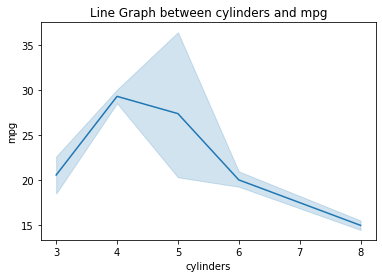

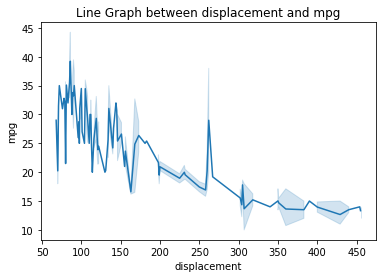

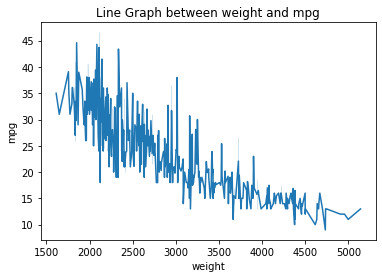

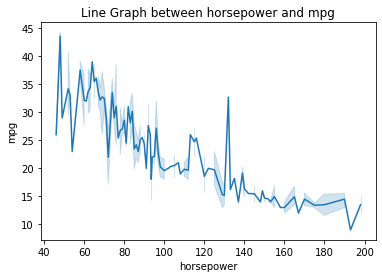

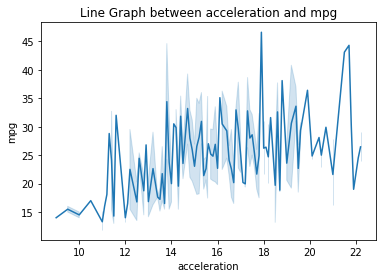

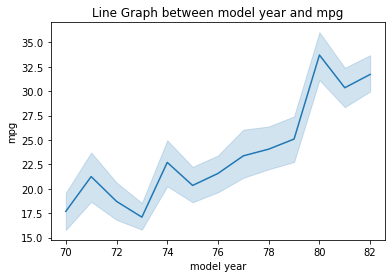

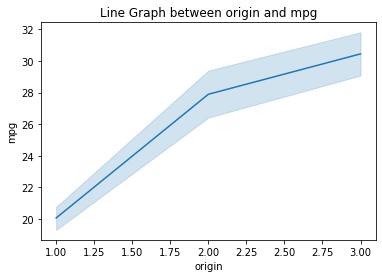

In [48]:
for col in cols_for_graph:
  sns.lineplot(x=col, y='mpg', data=df)
  plt.xlabel(col)
  plt.ylabel('mpg')
  plt.title('Line Graph between {} and mpg'.format(col))
  plt.show()

### Scatterplot

Plotting scatterplot between mpg and other features except 'car name'

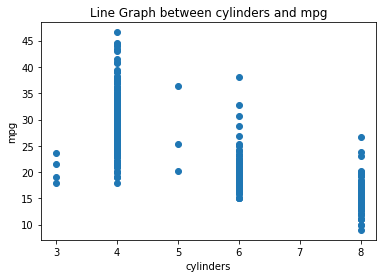

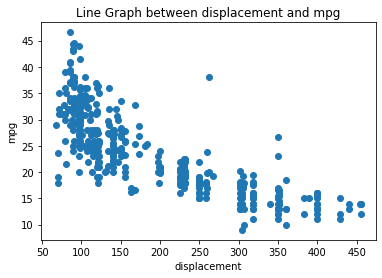

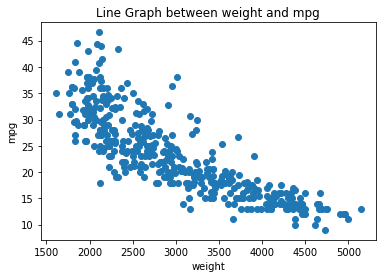

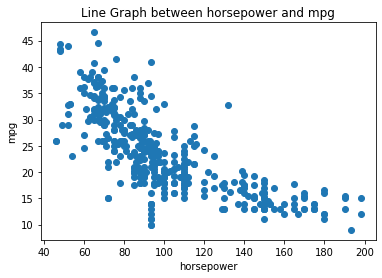

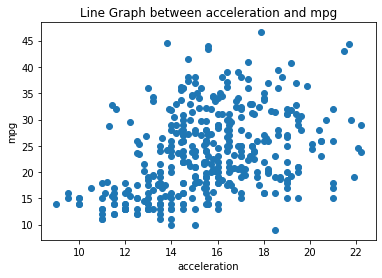

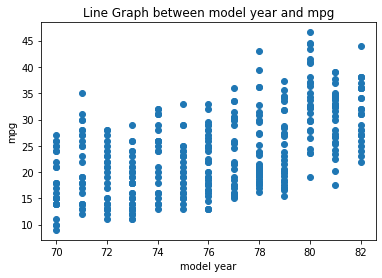

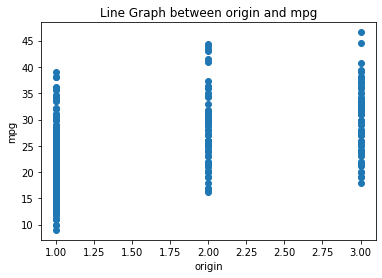

In [49]:
for col in cols_for_graph:
  plt.scatter(df[col], df['mpg'])
  plt.xlabel(col)
  plt.ylabel('mpg')
  plt.title('Line Graph between {} and mpg'.format(col))
  plt.show()

### Correlation

<Axes: >

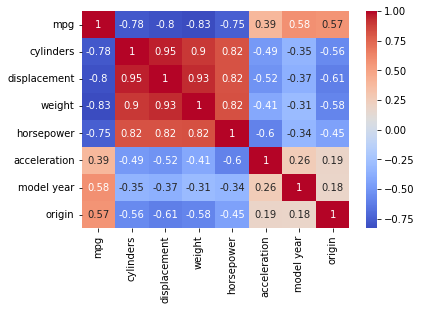

In [50]:
cols_for_corr = ['mpg','cylinders', 'displacement', 'weight', 'horsepower',
       'acceleration', 'model year', 'origin']
corr = df[cols_for_corr].corr()

# create the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')

We notice that mpg is **negatively correlated** to
> horsepower

> weight

> displacement

> cylinders

mpg is **positively correlated** to


> model year

> origin

## Model building

In [51]:
df.shape

(396, 9)

In [52]:
df.drop('car name', axis = 1, inplace = True)

In [53]:
features = ['cylinders', 'displacement', 'horsepower','weight',
             'model year', 'origin']

In [54]:
x = df[features]
x

,cylinders,displacement,horsepower,weight,model year,origin
0,8,307.0,130.0,3504,70,1
1,8,350.0,165.0,3693,70,1
2,8,318.0,150.0,3436,70,1
3,8,304.0,150.0,3433,70,1
4,8,302.0,140.0,3449,70,1
...,...,...,...,...,...,...
393,4,140.0,86.0,2790,82,1
394,4,97.0,52.0,2130,82,2
395,4,135.0,84.0,2295,82,1
396,4,120.0,79.0,2625,82,1


In [55]:
y = df['mpg']
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 396, dtype: float64

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8,test_size = 0.2, random_state = 7)

In [58]:
x_train.shape

(316, 6)

In [59]:
x_test.shape

(80, 6)

In [60]:
y_train.shape

(316,)

In [61]:
y_test.shape

(80,)

### Feature Scaling

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
x_train_scaled = StandardScaler().fit(x_train).transform(x_train)
x_test_scaled = StandardScaler().fit(x_test).transform(x_test)

Libraries

In [64]:
from sklearn.linear_model import (LinearRegression,
                                  Ridge,
                                  Lasso)
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor,
                              GradientBoostingRegressor)
from sklearn.metrics import mean_squared_error as mse
from math import sqrt

**METRICS:**
*   MSE 
*   RMSE

MAE doesn't necessarily penalise large errors. So, MSE and RMSE have been chosen

In [65]:
# arrays for sorting models based on mse and rmse
model_Name, model_MSE, model_RMSE = [],[],[]

### Linear Regression

In [66]:
lr = LinearRegression()

# Train the model on the training data
lr.fit(x_train_scaled, y_train)

# Predict the target variable on the test data
y_pred_linear = lr.predict(x_test_scaled)

#MSE, r2 and MAE
mse_linear = mse(y_test, y_pred_linear)
rmse_linear = sqrt(mse_linear)

# Evaluate the performance of the model
print("MSE linear:", mse_linear)
print("RMSE linear:", rmse_linear)

# append values to array
model_Name.append("Linear Reg")
model_MSE.append(mse_linear)
model_RMSE.append(rmse_linear)

MSE linear: 14.79826707770656
RMSE linear: 3.846851579890568


In [67]:
model_Name, model_MSE, model_RMSE

(['Linear Reg'], [14.79826707770656], [3.846851579890568])

In [68]:
result_df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred_linear})
result_df.head(10)

,Real Values,Predicted Values
377,31.0,34.854799
99,18.0,19.664932
217,30.0,26.742312
129,31.0,28.332186
74,13.0,10.099798
395,32.0,30.227697
52,30.0,23.608135
303,31.8,32.146302
221,17.5,16.430007
228,18.5,19.889912


### Polynomial Regression

In [69]:
# Transform the input features into polynomial terms
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train_scaled)
x_test_poly = poly.transform(x_test_scaled)

# Create a polynomial regression model
pr = LinearRegression()

# Train the model on the training data
pr.fit(x_train_poly, y_train)

# Predict the target variable on the test data
y_pred_poly = pr.predict(x_test_poly)

#MSE, r2 and MAE
mse_poly = mse(y_test, y_pred_poly)
rmse_poly = sqrt(mse_poly)

# Evaluate the performance of the model
print("MSE poly:", mse_poly)
print("RMSE poly:", rmse_poly)

# # append values to array
model_Name.append("Polynomial Reg")
model_MSE.append(mse_poly)
model_RMSE.append(rmse_poly)

MSE poly: 13.029404165943301
RMSE poly: 3.609626596469959


In [70]:
model_Name, model_MSE, model_RMSE

(['Linear Reg', 'Polynomial Reg'],
 [14.79826707770656, 13.029404165943301],
 [3.846851579890568, 3.609626596469959])

In [71]:
result_df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred_poly})
result_df.head(10)

,Real Values,Predicted Values
377,31.0,38.218768
99,18.0,17.021174
217,30.0,26.042967
129,31.0,28.221001
74,13.0,12.605118
395,32.0,31.260685
52,30.0,25.165689
303,31.8,33.518864
221,17.5,14.978239
228,18.5,17.987810


### Ridge Regression

In [72]:
# Create a ridge regression model
rr = Ridge(alpha=1)

# Train the model on the training data
rr.fit(x_train_scaled, y_train)

# Predict the target variable on the test data
y_pred_ridge = rr.predict(x_test_scaled)

mse_ridge = mse(y_test, y_pred_ridge)
rmse_ridge = sqrt(mse_ridge)

# Evaluate the performance of the model
print("MSE ridge:", mse_ridge)
print("RMSE ridge:", rmse_ridge)

# append values to array
model_Name.append("Ridge Reg")
model_MSE.append(mse_ridge)
model_RMSE.append(rmse_ridge)

MSE ridge: 14.76469385947631
RMSE ridge: 3.8424853753106607


In [73]:
model_Name, model_MSE, model_RMSE

(['Linear Reg', 'Polynomial Reg', 'Ridge Reg'],
 [14.79826707770656, 13.029404165943301, 14.76469385947631],
 [3.846851579890568, 3.609626596469959, 3.8424853753106607])

In [74]:
result_df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred_ridge})
result_df.head(10)

,Real Values,Predicted Values
377,31.0,34.798419
99,18.0,19.594265
217,30.0,26.717221
129,31.0,28.349596
74,13.0,10.173654
395,32.0,30.141461
52,30.0,23.649202
303,31.8,32.133107
221,17.5,16.385745
228,18.5,19.863350


### Lasso Regression

In [75]:
# Create a lasso regression model
lasso = Lasso(alpha=1)

# Train the model on the training data
lasso.fit(x_train_scaled, y_train)

# Predict the target variable on the test data
y_pred_lasso = lasso.predict(x_test_scaled)

mse_lasso = mse(y_test, y_pred_lasso)
rmse_lasso = sqrt(mse_lasso)

# Evaluate the performance of the model
print("MSE lasso:", mse_lasso)
print("RMSE lasso:", rmse_lasso)

# append values to array
model_Name.append("Lasso Reg")
model_MSE.append(mse_lasso)
model_RMSE.append(rmse_lasso)

MSE lasso: 15.066874594864526
RMSE lasso: 3.8816072180044863


In [76]:
model_Name, model_MSE, model_RMSE

(['Linear Reg', 'Polynomial Reg', 'Ridge Reg', 'Lasso Reg'],
 [14.79826707770656,
  13.029404165943301,
  14.76469385947631,
  15.066874594864526],
 [3.846851579890568,
  3.609626596469959,
  3.8424853753106607,
  3.8816072180044863])

In [77]:
result_df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred_lasso})
result_df.head(10)

,Real Values,Predicted Values
377,31.0,31.943345
99,18.0,20.305442
217,30.0,26.864549
129,31.0,27.323026
74,13.0,12.441926
395,32.0,29.072954
52,30.0,24.320510
303,31.8,29.985848
221,17.5,17.294192
228,18.5,19.924284


### SVR

In [78]:
svr = SVR(kernel='linear', C=1, epsilon=0.1)

# Train the model on the training data
svr.fit(x_train_scaled, y_train)

# Predict the target variable on the test data
y_pred_svr = svr.predict(x_test_scaled)

mse_svr = mse(y_test, y_pred_svr)
rmse_svr = sqrt(mse_svr)

# Evaluate the performance of the model
print("MSE SVR:", mse_svr)
print("RMSE SVR:", rmse_svr)

# append values to array
model_Name.append("SVR")
model_MSE.append(mse_svr)
model_RMSE.append(rmse_svr)

MSE SVR: 15.068400803164044
RMSE SVR: 3.88180380791766


In [79]:
model_Name, model_MSE, model_RMSE

(['Linear Reg', 'Polynomial Reg', 'Ridge Reg', 'Lasso Reg', 'SVR'],
 [14.79826707770656,
  13.029404165943301,
  14.76469385947631,
  15.066874594864526,
  15.068400803164044],
 [3.846851579890568,
  3.609626596469959,
  3.8424853753106607,
  3.8816072180044863,
  3.88180380791766])

In [80]:
result_df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred_svr})
result_df.head(10)

,Real Values,Predicted Values
377,31.0,33.924513
99,18.0,19.478832
217,30.0,26.001446
129,31.0,28.316466
74,13.0,10.743014
395,32.0,28.970419
52,30.0,23.791554
303,31.8,31.557643
221,17.5,16.373420
228,18.5,19.442126


### Decision Tree Regressor

In [81]:
# Create a decision tree regressor
dtr = DecisionTreeRegressor(max_depth=5, random_state=42)

# Train the model on the training data
dtr.fit(x_train_scaled, y_train)

# Predict the target variable on the test data
y_pred_dtr = dtr.predict(x_test_scaled)

mse_dtr = mse(y_test, y_pred_dtr)
rmse_dtr = sqrt(mse_dtr)

# Evaluate the performance of the model
print("MSE dtr:", mse_dtr)
print("RMSE dtr:", rmse_dtr)

# # append values to array
model_Name.append("DT Reg")
model_MSE.append(mse_dtr)
model_RMSE.append(rmse_dtr)

MSE dtr: 21.331236812033218
RMSE dtr: 4.618575192852577


In [82]:
model_Name, model_MSE, model_RMSE

(['Linear Reg', 'Polynomial Reg', 'Ridge Reg', 'Lasso Reg', 'SVR', 'DT Reg'],
 [14.79826707770656,
  13.029404165943301,
  14.76469385947631,
  15.066874594864526,
  15.068400803164044,
  21.331236812033218],
 [3.846851579890568,
  3.609626596469959,
  3.8424853753106607,
  3.8816072180044863,
  3.88180380791766,
  4.618575192852577])

In [83]:
result_df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred_dtr})
result_df.head(10)

,Real Values,Predicted Values
377,31.0,33.437500
99,18.0,17.350000
217,30.0,23.306667
129,31.0,32.285714
74,13.0,12.523810
395,32.0,34.089474
52,30.0,24.833333
303,31.8,33.437500
221,17.5,14.559524
228,18.5,14.559524


### Random Forest Regressor

In [84]:
# Create a random forest regressor
rfr = RandomForestRegressor(n_estimators=100, max_depth=14, random_state=42)

# Train the model on the training data
rfr.fit(x_train_scaled, y_train)

# Predict the target variable on the test data
y_pred_rfr = rfr.predict(x_test_scaled)

mse_rfr = mse(y_test, y_pred_rfr)
rmse_rfr = sqrt(mse_rfr)

# Evaluate the performance of the model
print("MSE rfr:", mse_rfr)
print("RMSE rfr:", rmse_rfr)

# append values to array
model_Name.append("RF Reg")
model_MSE.append(mse_rfr)
model_RMSE.append(rmse_rfr)

MSE rfr: 11.509173513805427
RMSE rfr: 3.392517282757072


In [85]:
model_Name, model_MSE, model_RMSE

(['Linear Reg',
  'Polynomial Reg',
  'Ridge Reg',
  'Lasso Reg',
  'SVR',
  'DT Reg',
  'RF Reg'],
 [14.79826707770656,
  13.029404165943301,
  14.76469385947631,
  15.066874594864526,
  15.068400803164044,
  21.331236812033218,
  11.509173513805427],
 [3.846851579890568,
  3.609626596469959,
  3.8424853753106607,
  3.8816072180044863,
  3.88180380791766,
  4.618575192852577,
  3.392517282757072])

In [86]:
result_df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred_rfr})
result_df.head(10)

,Real Values,Predicted Values
377,31.0,35.101000
99,18.0,16.691000
217,30.0,24.927200
129,31.0,28.313000
74,13.0,12.685000
395,32.0,30.579000
52,30.0,23.367000
303,31.8,33.470567
221,17.5,15.310000
228,18.5,15.083000


### Gradient Boosting Regressor

In [87]:
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model on the training data
model.fit(x_train_scaled, y_train)

# Make predictions on the test data
y_pred_gbr = model.predict(x_test_scaled)

mse_gbr = mse(y_test, y_pred_gbr)
rmse_gbr = sqrt(mse_gbr)

# Evaluate the performance of the model
print("MSE gbr:", mse_gbr)
print("RMSE gbr:", rmse_gbr)

# append values to array
model_Name.append("GB Reg")
model_MSE.append(mse_gbr)
model_RMSE.append(rmse_gbr)

MSE gbr: 13.231229101026027
RMSE gbr: 3.6374756495440663


In [88]:
model_Name, model_MSE, model_RMSE

(['Linear Reg',
  'Polynomial Reg',
  'Ridge Reg',
  'Lasso Reg',
  'SVR',
  'DT Reg',
  'RF Reg',
  'GB Reg'],
 [14.79826707770656,
  13.029404165943301,
  14.76469385947631,
  15.066874594864526,
  15.068400803164044,
  21.331236812033218,
  11.509173513805427,
  13.231229101026027],
 [3.846851579890568,
  3.609626596469959,
  3.8424853753106607,
  3.8816072180044863,
  3.88180380791766,
  4.618575192852577,
  3.392517282757072,
  3.6374756495440663])

In [89]:
result_df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred_gbr})
result_df.head(10)

,Real Values,Predicted Values
377,31.0,36.466723
99,18.0,16.544654
217,30.0,25.670609
129,31.0,27.606985
74,13.0,12.583108
395,32.0,29.644546
52,30.0,23.233485
303,31.8,33.443508
221,17.5,15.093044
228,18.5,16.191746


### Sorting values based on MSE

In [90]:
MSE_dict = pd.DataFrame({"MODEL": model_Name, "MSE": model_MSE})
MSE_dict.sort_values(by="MSE", inplace = True)
MSE_dict

,MODEL,MSE
6,RF Reg,11.509174
1,Polynomial Reg,13.029404
7,GB Reg,13.231229
2,Ridge Reg,14.764694
0,Linear Reg,14.798267
3,Lasso Reg,15.066875
4,SVR,15.068401
5,DT Reg,21.331237


### Sorting values based on RMSE

In [91]:
RMSE_dict = pd.DataFrame({"MODEL": model_Name, "RMSE": model_RMSE})
RMSE_dict.sort_values(by="RMSE", inplace = True)
RMSE_dict

,MODEL,RMSE
6,RF Reg,3.392517
1,Polynomial Reg,3.609627
7,GB Reg,3.637476
2,Ridge Reg,3.842485
0,Linear Reg,3.846852
3,Lasso Reg,3.881607
4,SVR,3.881804
5,DT Reg,4.618575
